# Assignment 03 - Pandas
*EMSE 6574 - Programming Analytics*
Madeline Warndorf

*Notes:*
 - All code should follow the PEP 8 Style Guide for Python
 - Assignment should be submitted using jupyter notebooks
  - File name should follow “{Your Name} – Assignment_XX_Submission”
  - Each Task should be contained in its own cell
  - Each Task should be properly commented
  - Each Task should print out the answer to the Task if appropriate (Ex. Task 2)
  - Sample submission can be found on blackboard under the “outline” section
  - **Not following these standards may result in lost points**
 - For this assignment you will need to download **‘boston_housing_data.csv’** file from blackboard
 
*Note: Description of columns can be found on [kaggle](https://www.kaggle.com/c/boston-housing)*


## Task 1

Load the boston_housing_data.csv into a dataframe.

In [2]:
# Space for Task 1 Code
import pandas as pd

df=pd.read_csv("boston_housing_data.csv")

df.head()

,Crime/Capita,% Large Plots,% Non-Retail Business,Riverfront,NOX Conc.,Avg # Rooms,% Built Prior 1940,Dist. Emp. Centers,Access to Radial Highways,Property Tax,Pupil-Teacher-RATIO,B,LSTAT,Median Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,NaN,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,NaN,2.0,242.0,17.8,NaN,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,NaN,0.0,2.18,NaN,0.458,7.147,NaN,6.0622,NaN,222.0,18.7,396.90,NaN,NaN


## Task 2

Focusing on the **‘Median Value’** column, calculate the basic statistics (mean, median, std) for each NaN handling methodology (bfill, ffill, removal). Write a couple sentences analyzing how the methods compare, and discuss the risks involved with each approach.

*Include both code and comments below.*

In [20]:
# Space for Task 2 Code
df.columns
mvcol = df['Median Value']
#print(mvcol)
mvffill = mvcol.fillna(method='ffill')
print("ffill")
print(mvffill.mean())
print(mvffill.median())
print(mvffill.std())
mvbfill = mvcol.fillna(method='bfill')
print("bfill")
print(mvbfill.mean())
print(mvbfill.median())
print(mvbfill.std())
mvrem = mvcol.dropna()
print("removal")
print(mvrem.mean())
print(mvrem.median())
print(mvrem.std())

ffill
22.433794466403185
21.05
9.220426324911319
bfill
22.445256916996073
21.2
9.114120653162194
removal
22.238255033557067
21.0
9.102253680291085


**Task 2 Comments**

Write a couple sentences analyzing how the methods compare, and discuss the risks involved with each approach.

The ffill method gave slightly larger numbers than the bfill method. This could be because with the ffill method there could potentially have more repetitions of values compared to the bfill method. The removal method caused lower numbers because instead of filling the missing data points the record was completely removed.

## Task 3

Address the NaN’s in the **% Built Prior 1940** column. For each approach determine the correlation between **% Built Prior 1940** and **Median Value**. Write a couple sentences explaining how each approach effects how the two columns are correlated.

In [25]:
# Space for Task 3 Code
bm = df[['% Built Prior 1940','Median Value']]

bmffill = bm.fillna(method='ffill')
print("ffill")
print(bmffill.corr())
bmbfill = bm.fillna(method='bfill')
print("bfill")
print(bmbfill.corr())
bmrem = bm.dropna()
print("removal")
print(bmrem.corr())

ffill
                    % Built Prior 1940  Median Value
% Built Prior 1940            1.000000     -0.364969
Median Value                 -0.364969      1.000000
bfill
                    % Built Prior 1940  Median Value
% Built Prior 1940            1.000000     -0.369258
Median Value                 -0.369258      1.000000
removal
                    % Built Prior 1940  Median Value
% Built Prior 1940            1.000000     -0.371502
Median Value                 -0.371502      1.000000


**Task 3 Comments**

Removing the NAs entirely with dropna() caused a larger correlation between the two. Bfill had a slightly smaller correlation but it still increased from Ffill. 

## Task 4

Plot a (properly labeled) histogram of the **Avg # of rooms**.

Text(0,0.5,'Frequency')

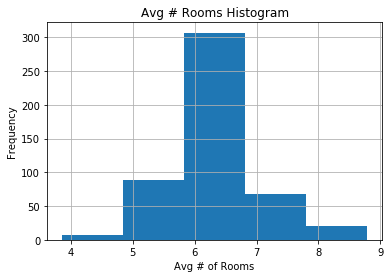

In [55]:
# Space for Task 4
import matplotlib.pyplot as plt

ar = df['Avg # Rooms']
#plt.hist(ar, bins = 5)
h = ar.hist(bins = 5)
h.set_title("Avg # Rooms Histogram")
h.set_xlabel("Avg # of Rooms")
h.set_ylabel("Frequency")

## Task 5
Plot a (properly labelled) scatter plot between **% Built Prior 1940** and **% Large Plots**

Text(0,0.5,'% Large Plots')

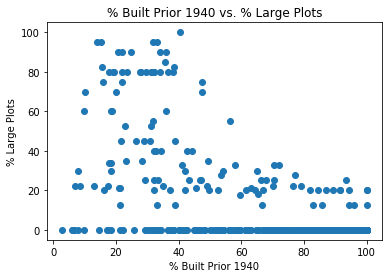

In [61]:
# Space for Task 5

plt.scatter(df['% Built Prior 1940'], df['% Large Plots'])
plt.title("% Built Prior 1940 vs. % Large Plots")
plt.xlabel("% Built Prior 1940")
plt.ylabel("% Large Plots")

## Task 6

Generate a new features for the dataset equal to the following equation:

$$\text{Riverfront Rooms} = 
\begin{cases}
\lceil \text{Avg # Rooms} \rceil/2,  & \text{if $Riverfront$ is 1} \\
0, & \text{if $Riverfront$ is 0}
\end{cases}
$$

*Note: $\lceil \text{#} \rceil$ means to take the ceiling of the # (e.g. $\lceil 3.2 \rceil = 4$)*

In [144]:
# Space for Task 6
import numpy as np
from math import ceil

nf = df[['Riverfront','Avg # Rooms']]

def func(df):
    """takes dataframe and creates list of Riverfront Rooms following
    the guidelines given. If Riverfront is 1, ceil(Avg # Rooms)/2, if 0 then 0
    Args:
        nf (dataframe) - dataframe containing Riverfront and Avg # Rooms
        lst (list) - a list of ints/floats/str
    Returns:
        lst (list) - filled list of Riverfront Rooms
    """
    nf = df[['Riverfront','Avg # Rooms']]
    lst = []
    for row,rowv in nf.iterrows():
        n = rowv['Avg # Rooms']
        if rowv['Riverfront'] == 1:
            l = ceil(n)/2
            #print(l)
        elif rowv['Riverfront'] == 0:
            l = 0
        else:
            l = np.nan
        lst.append(l)
    return(lst)

df["Riverfront Rooms"] = func(df)
#print(df['Riverfront Rooms'])

## Task 7

Group the dataframe by the **Avg # of Rooms** column and calculate the **mean** and **median Median Value** for each group. How does the number of rooms per house affect the mean median value of the houses?

In a couple of sentences write what the relationship between **Avg # of Rooms** and **Median Value** means.

In [149]:
# Space for Task 7 code
grouped = df['Median Value'].groupby(df['Avg # Rooms'])
#print(grouped)
print(grouped.mean())
print(grouped.median())

Avg # Rooms
3.863    23.10
4.138    12.85
4.368     8.80
4.519     7.00
4.628    17.90
4.652    10.50
4.880    10.20
4.903    11.80
4.906    13.80
4.926    14.60
4.963    21.90
4.970    50.00
4.973    16.10
5.000     7.40
5.012    15.30
5.019    14.40
5.036     9.70
5.093     8.10
5.155    16.30
5.186    17.80
5.272    13.10
5.277     7.20
5.304    11.20
5.344    20.00
5.349     8.30
5.362    20.80
5.390    15.60
5.399    14.40
5.403    13.40
5.404    19.45
         ...  
7.412    31.70
7.416    33.20
7.420      NaN
7.454    44.00
7.470      NaN
7.489    50.00
7.520    43.10
7.645      NaN
7.691    35.20
7.765    39.80
7.802      NaN
7.820    45.40
7.831    50.00
7.853    48.50
7.875    50.00
7.923    50.00
7.929    50.00
8.034    50.00
8.040    37.60
8.069    38.70
8.247      NaN
8.259    42.80
8.266    44.80
8.297    50.00
8.337    41.70
8.375    50.00
8.398    48.80
8.704      NaN
8.725    50.00
8.780    21.90
Name: Median Value, Length: 433, dtype: float64
Avg # Rooms
3.863    23.1

The group relationship between Avg # Rooms and the Median Value is that as the Avg # of rooms increases in each room group (1 - 8) so does the Median Value. It has a positive relationship.